In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
#read the datasets

youtubeUSData = pd.read_csv("Resources/US_Merged_data.csv", low_memory=False)
youtubeCAData = pd.read_csv("Resources/CA_Merged_data.csv", low_memory=False)
youtubeGBData = pd.read_csv("Resources/GB_Merged_data.csv", low_memory=False)
youtubeINData = pd.read_csv("Resources/IN_Merged_data.csv", low_memory=False)
#categoryID = pd.read_csv


In [4]:
# format the trending and publishing date 
youtubeUSData['publishedAt'] = pd.to_datetime(youtubeUSData['publishedAt'], format='%Y-%m-%dT%H:%M:%SZ')
#youtubeUSData

youtubeUSData['trending_date'] = pd.to_datetime(youtubeUSData['trending_date'], format='%Y-%m-%dT%H:%M:%SZ')
youtubeUSData.head()

,Unnamed: 0,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,categoryName
0,0,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11 07:30:02,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911.0,296541.0,6180.0,30059.0,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...,Music
1,1,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771.0,23252.0,1856.0,7648.0,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,Music
2,2,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11 15:00:13,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070.0,714295.0,15176.0,31048.0,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,Music
3,3,2avPJ9TZNmU,Juice WRLD & The Weeknd - Smile (Official Video),2020-08-11 18:03:12,UC0BletW9phE4xHFM44q4qKA,Juice WRLD,10,2020-08-12,JuiceWRLD|juiceworld|juice world|juice wrld|999,2228821.0,289403.0,1720.0,25136.0,https://i.ytimg.com/vi/2avPJ9TZNmU/default.jpg,False,False,Juice WRLD & The Weeknd - Smile is available n...,Music
4,4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11 09:00:13,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885.0,353336.0,9763.0,23405.0,https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...,Music


In [5]:
# sort values by view count
viewDataUS = youtubeUSData.sort_values("view_count", ascending=False)
#viewDataUS.set_index('view_count').head(1)

# clean US data for bar chart

USviewsAndTitle = viewDataUS[["view_count","title"]].head()
#USviewsAndTitle.head()


# remove duplicates from US data
USnoDup = viewDataUS.drop_duplicates(subset=['title'], keep='first')
#USnoDup.head(20)
# find top 5 videos

# remove duplicates p. 2

USviewsAndTitle = USnoDup[["view_count","title"]]
USviewsAndTitle.head(10)

,view_count,title
8606,264407389.0,BTS (방탄소년단) 'Butter' Official MV
626,232649205.0,BTS (방탄소년단) 'Dynamite' Official MV
27284,194625542.0,JETSKI WAX PRANK!! 🤣 - #Shorts
924,184778248.0,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V
11783,161848202.0,LISA - 'LALISA' M/V
37218,153462028.0,Beach Money Ball!!💵🌊💵
3747,150622781.0,BTS (방탄소년단) 'Life Goes On' Official MV
9987,149052229.0,BTS (방탄소년단) 'Permission to Dance' Official MV
2014,140685439.0,BLACKPINK – ‘Lovesick Girls’ M/V
26838,137308926.0,When the cheating went wrong #Shorts


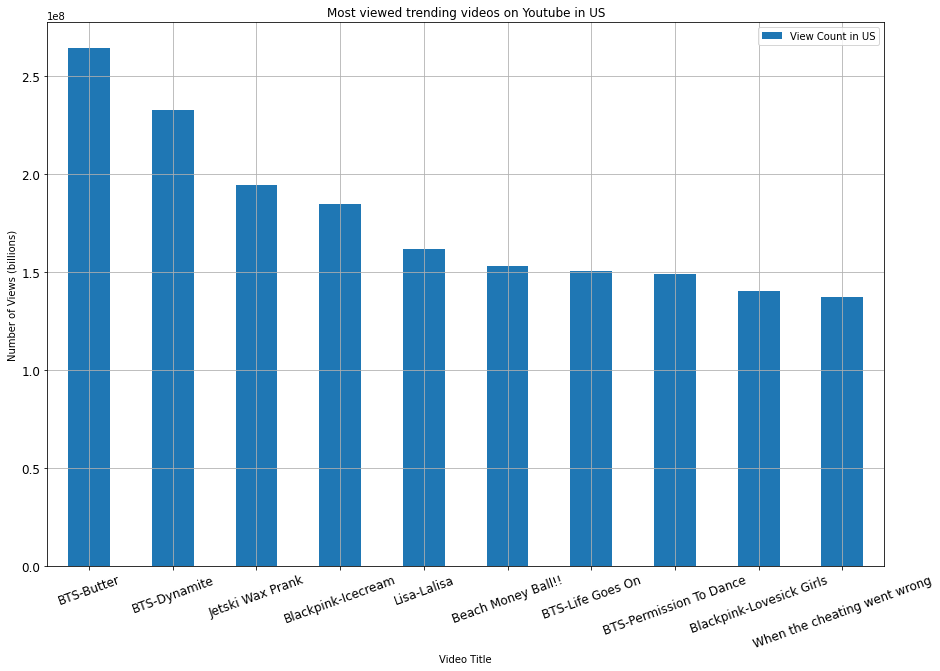

In [6]:
USviewsAndTitletop = USviewsAndTitle.head(10)
#define x

#x_axis = np.arange(len(USviewsAndTitletop5))

USviewsAndTitletop[['view_count','title']].plot(kind='bar',figsize=(15,10),legend=True,fontsize=12)

plt.xlabel("Video Title") 
plt.ylabel("Number of Views (billions)") 
plt.title("Most viewed trending videos on Youtube in US") 
plt.legend(["View Count in US"],loc='best')
plt.xticks([0,1,2,3,4,5,6,7,8,9], ['BTS-Butter','BTS-Dynamite','Jetski Wax Prank', 'Blackpink-Icecream',
                                   'Lisa-Lalisa', 'Beach Money Ball!!', 'BTS-Life Goes On','BTS-Permission To Dance',
                                   'Blackpink-Lovesick Girls', 'When the cheating went wrong'], rotation=20)
plt.grid()
plt.show()

In [7]:
viewDataCA = youtubeCAData.sort_values("view_count", ascending=False)
#viewDataCA.set_index("view_count").head(1)

# clean Canada data for bar chart

CAviewsAndTitle = viewDataCA[["view_count","title"]].head()
CAviewsAndTitle.head()

viewDataCA = youtubeCAData.sort_values("view_count", ascending=False)
#viewData.set_index("view_count").head()


# remove duplicates from Canada data
CAnoDup = viewDataCA.drop_duplicates(subset=['title'], keep='first')
CAnoDup.head(20)
# find top 5 videos

# remove duplicates p. 2

CAviewsAndTitle = CAnoDup[["view_count","title"]]
CAviewsAndTitle.head(10)

,view_count,title
8606,264407389.0,BTS (방탄소년단) 'Butter' Official MV
626,232649205.0,BTS (방탄소년단) 'Dynamite' Official MV
27284,194625542.0,JETSKI WAX PRANK!! 🤣 - #Shorts
924,184778248.0,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V
11783,161848202.0,LISA - 'LALISA' M/V
37218,153462028.0,Beach Money Ball!!💵🌊💵
3747,150622781.0,BTS (방탄소년단) 'Life Goes On' Official MV
9987,149052229.0,BTS (방탄소년단) 'Permission to Dance' Official MV
2014,140685439.0,BLACKPINK – ‘Lovesick Girls’ M/V
26838,137308926.0,When the cheating went wrong #Shorts


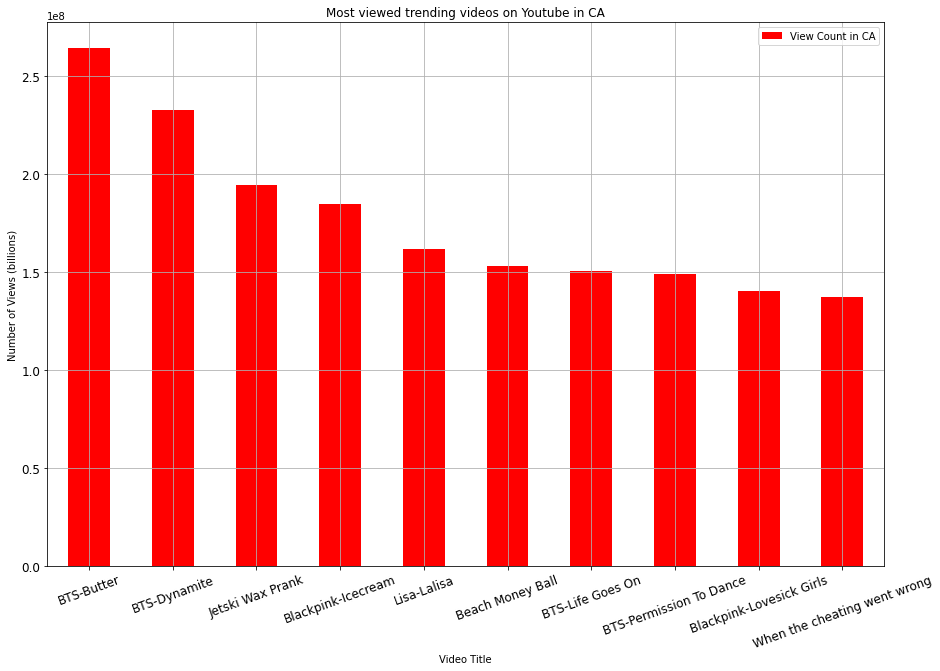

In [8]:
CAviewsAndTitletop5 = CAviewsAndTitle.head(10)
# canada bar plot
CAviewsAndTitletop5[['view_count','title']].plot(kind='bar',color='red', figsize=(15,10),legend=True,fontsize=12)

#xticks(np.arange(0,4,step=0.2))
#xticks(np.arange(3)["BTS-Butter","BTS-Dynamite","Jetski Wax Prank","Blackpink-Ice Cream with Selena Gomez",
                   #"Lisa-Lalisa"])

plt.xlabel("Video Title") 
plt.ylabel("Number of Views (billions)") 
plt.title("Most viewed trending videos on Youtube in CA") 
plt.legend(["View Count in CA"],loc='best')
plt.xticks([0,1,2,3,4,5,6,7,8,9], ['BTS-Butter','BTS-Dynamite','Jetski Wax Prank', 'Blackpink-Icecream',
                                   'Lisa-Lalisa', 'Beach Money Ball','BTS-Life Goes On','BTS-Permission To Dance',
                                   'Blackpink-Lovesick Girls', 'When the cheating went wrong'], rotation=20)
plt.grid()
plt.show()

In [9]:
viewDataGB = youtubeGBData.sort_values("view_count", ascending=False)
#viewDataCA.set_index("view_count").head(1)

# clean GB data for bar chart
GBviewsAndTitle = viewDataGB[["view_count","title"]].head()
GBviewsAndTitle.sort_values("view_count",ascending=False)

# remove duplicates from GB data
GBnoDup = viewDataGB.drop_duplicates(subset=['title'], keep='first')
GBnoDup.head(20)

# remove duplicates p. 2

GBviewsAndTitle = GBnoDup[["view_count","title"]]
GBviewsAndTitle.head(10)

,view_count,title
43151,208581468.0,BTS (방탄소년단) 'Dynamite' Official MV
16232,194625542.0,JETSKI WAX PRANK!! 🤣 - #Shorts
43470,176467113.0,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V
50504,166895681.0,BTS (방탄소년단) 'Butter' Official MV
52074,156482499.0,BTS (방탄소년단) 'Permission to Dance' Official MV
53721,154134590.0,LISA - 'LALISA' M/V
46055,141428767.0,BTS (방탄소년단) 'Life Goes On' Official MV
16191,124476794.0,MvRyhan Funny videos #tiktok #Shorts
44531,124180499.0,BLACKPINK – ‘Lovesick Girls’ M/V
17621,121633557.0,MYSTERY INSIDE TOOTHPASTE?!


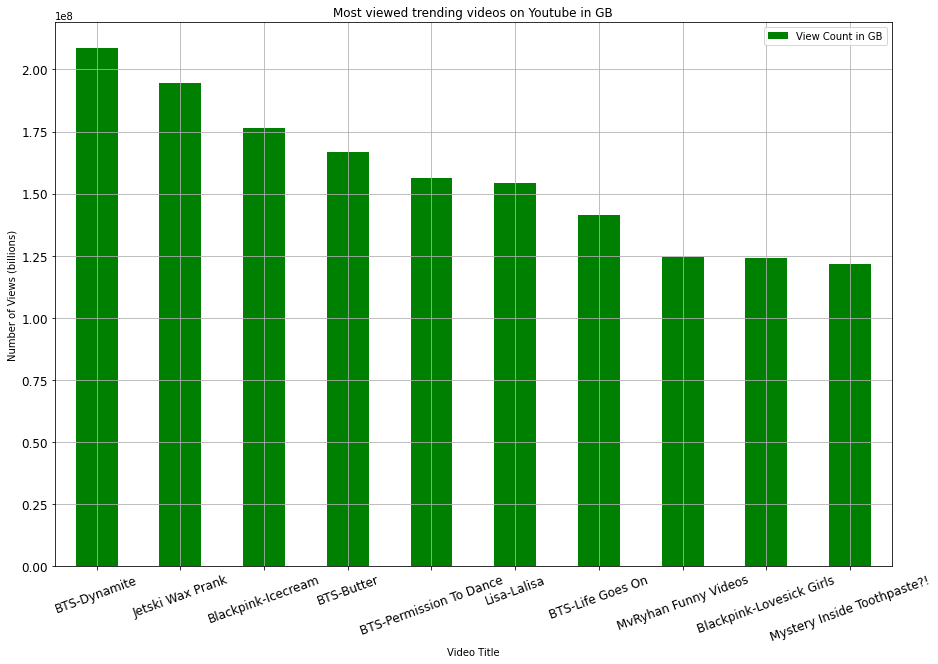

In [10]:
GBviewsAndTitletop5 = GBviewsAndTitle.head(10)
# GB bar plot
GBviewsAndTitletop5[['view_count','title']].plot(kind='bar',color='green', figsize=(15,10),legend=True,fontsize=12)

#GB bar plot
plt.xlabel("Video Title") 
plt.ylabel("Number of Views (billions)") 
plt.title("Most viewed trending videos on Youtube in GB") 
plt.legend(["View Count in GB"],loc='best')
plt.xticks([0,1,2,3,4,5,6,7,8,9], ['BTS-Dynamite','Jetski Wax Prank', 'Blackpink-Icecream',
                                   'BTS-Butter','BTS-Permission To Dance','Lisa-Lalisa','BTS-Life Goes On',
                                   'MvRyhan Funny Videos','Blackpink-Lovesick Girls', 'Mystery Inside Toothpaste?!'], rotation=20)
plt.grid()
plt.show()

In [11]:
viewDataIN = youtubeINData.sort_values("view_count", ascending=False)
#viewDataCA.set_index("view_count").head(1)

viewData = youtubeINData.sort_values("view_count", ascending=False)
#viewData.set_index("view_count").head()

# remove duplicates from IN data
INnoDup = viewDataIN.drop_duplicates(subset=['title'], keep='first')
INnoDup.head(20)
# remove duplicates p. 2

INviewsAndTitle = INnoDup[["view_count","title"]]
INviewsAndTitle.head(10)

,view_count,title
52057,264407389,BTS (방탄소년단) 'Butter' Official MV
3619,253995993,BTS (방탄소년단) 'Dynamite' Official MV
64049,202091414,Filhaal2 Mohabbat | Akshay Kumar Ft Nupur Sano...
4735,184778248,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V
64265,162473728,BTS (방탄소년단) 'Permission to Dance' Official MV
76050,161848202,LISA - 'LALISA' M/V
29476,156704924,KGF Chapter2 TEASER |Yash|Sanjay Dutt|Raveena ...
20226,150622781,BTS (방탄소년단) 'Life Goes On' Official MV
63215,144239829,Turn into orbeez - Tutorial #Shorts
57398,141191928,Paytm IPL 2021 Ad - The Salon (English)


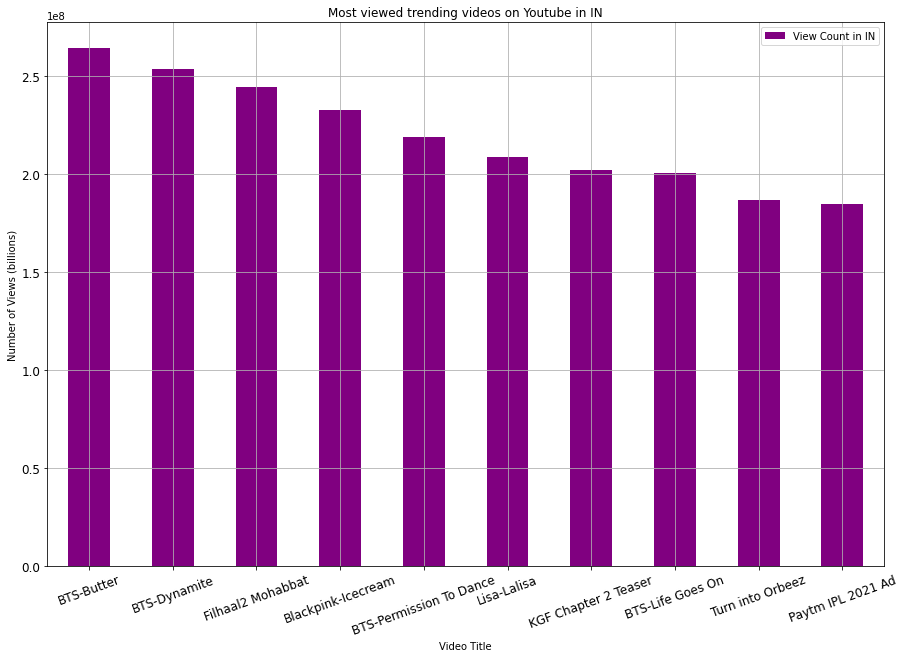

In [12]:
# clean IN data for bar chart
INviewsAndTitle = viewDataIN[["view_count","title"]].head(10)
INviewsAndTitle.sort_values("view_count",ascending=False)

INviewsAndTitletop5 = INviewsAndTitle.head(10)
# India bar plot
INviewsAndTitletop5[['view_count','title']].plot(kind='bar',color='purple', figsize=(15,10),legend=True,fontsize=12)

plt.xlabel("Video Title") 
plt.ylabel("Number of Views (billions)") 
plt.title("Most viewed trending videos on Youtube in IN") 
plt.legend(["View Count in IN"],loc='best')
plt.xticks([0,1,2,3,4,5,6,7,8,9], ['BTS-Butter','BTS-Dynamite','Filhaal2 Mohabbat', 'Blackpink-Icecream',
                                   'BTS-Permission To Dance', 'Lisa-Lalisa', 'KGF Chapter 2 Teaser','BTS-Life Goes On',
                                   'Turn into Orbeez', 'Paytm IPL 2021 Ad'], rotation=20)
plt.grid()
plt.show()

In [13]:
# calculating who trended the longest
#trendingUSData = youtubeUSData.sort_values("dislikes", ascending=False)

#trendingUSData.groupby('videoId')
#trendingNoDupUS = trendingUSData.drop_duplicates(subset=["title"],keep='first')

#trendingNoDupUS.head(10)
#trendingNoDupUS.reset_index()

categoryUSData = youtubeUSData.sort_values('video_id')
UStrendandpub = viewDataUS[["view_count","publishedAt","trending_date","title","channelTitle","categoryId","video_id","likes","dislikes"]]
UStrendandpubnoDup = UStrendandpub.drop_duplicates(subset=['title'],keep='first')
UStrendandpubnoDup.head(20)
#categoryUSData.head(50)

,view_count,publishedAt,trending_date,title,channelTitle,categoryId,video_id,likes,dislikes
8606,264407389.0,2021-05-21 03:46:13,2021-05-30,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,10,WMweEpGlu_U,16021548.0,150990.0
626,232649205.0,2020-08-21 03:58:10,2020-08-28,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,10,gdZLi9oWNZg,15735572.0,714195.0
27284,194625542.0,2021-07-04 19:00:09,2021-07-15,JETSKI WAX PRANK!! 🤣 - #Shorts,Julius Dein,24,qF0N19MgI3Q,4935525.0,170930.0
924,184778248.0,2020-08-28 04:00:11,2020-09-05,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,BLACKPINK,10,vRXZj0DzXIA,11795687.0,879357.0
11783,161848202.0,2021-09-10 04:00:13,2021-09-17,LISA - 'LALISA' M/V,BLACKPINK,10,awkkyBH2zEo,11534042.0,122018.0
37218,153462028.0,2021-04-08 00:45:00,2021-04-19,Beach Money Ball!!💵🌊💵,Klem Family,20,-f0ISwe2a6o,3144757.0,143769.0
3747,150622781.0,2020-11-20 04:58:11,2020-11-28,BTS (방탄소년단) 'Life Goes On' Official MV,Big Hit Labels,10,-5q5mZbe3V8,11405036.0,126206.0
9987,149052229.0,2021-07-09 03:59:12,2021-07-15,BTS (방탄소년단) 'Permission to Dance' Official MV,HYBE LABELS,10,CuklIb9d3fI,11988838.0,94812.0
2014,140685439.0,2020-10-02 04:00:13,2020-10-09,BLACKPINK – ‘Lovesick Girls’ M/V,BLACKPINK,10,dyRsYk0LyA8,9217884.0,127311.0
26838,137308926.0,2021-06-25 00:56:11,2021-07-05,When the cheating went wrong #Shorts,Fortnite Fun TV,24,uTQnMukAhsg,3945907.0,114469.0


In [14]:
categorySortUS = UStrendandpubnoDup.sort_values(by=["categoryId","view_count"], ascending=False)
#categorySortUS.head(20)

In [15]:
#print(categorySortUS['categoryId']).count()
#usIdIndex = categorySortUS.groupby('categoryId').count()
#usIdIndexReal = usIdIndex.reset_index()
#usIdIndexReal

In [16]:
#United States
# calculate difference between last trending date and published at date
US_time_diff = pd.DataFrame(columns = ["publishedAt","trending_date"])

US_time_diff.publishedAt = youtubeUSData.loc[:,"publishedAt"]
US_time_diff.publishedAt = pd.to_datetime(US_time_diff.publishedAt)

US_time_diff.trending_date = youtubeUSData.loc[:,"trending_date"]
US_time_diff.trending_date = pd.to_datetime(US_time_diff.trending_date)

difference_US = pd.DataFrame(US_time_diff.trending_date - US_time_diff.publishedAt)
difference_US.head()



# add 'time trending' column
youtubeUSData['Time Trending'] = difference_US[0].values
US_trend_data = youtubeUSData.sort_values('Time Trending',ascending=False)

# create dataset of title and time trending
US_trend_data = youtubeUSData[["Time Trending","title","categoryId"]]
US_trend_data = US_trend_data.drop_duplicates(subset=['title'],keep='last')
US_trend_data.sort_values('Time Trending', ascending=False).head(20)

#INviewsAndTitle = INnoDup[["view_count","title"]]

,Time Trending,title,categoryId
52516,33 days 07:59:52,I SAID WHAT!? #SHORTS | BAILEY SPINN,22
76290,33 days 07:59:34,iPad Air — Boiiing,28
51217,33 days 04:22:24,COUPLES WORKOUT CHALLENGE,22
58026,32 days 18:37:08,What Is International Women's Day?,27
46025,32 days 13:03:45,Circulating Seal,22
58309,32 days 11:59:52,Why Charging By The Hour Doesn't Make Sense,27
56269,32 days 10:37:12,Simple rangoli design spoon l rangoli designs ...,26
52518,32 days 07:59:57,I CANT SPEAK # SHORTS | BAILEY SPINN,22
80795,32 days 04:45:57,Apple Pencil Mini for iPhone (Concept Idea),1
27399,32 days 04:29:40,When Rappers Snitch On Themselves,24


In [17]:
US_grouped = US_trend_data.sort_values('categoryId')
US_grouped_A = US_grouped[['Time Trending','categoryId']]
#US_grouped_A.sort_values('categoryId', ascending=False)

#US_grouped_A.value_counts('categoryId')

In [18]:
#Canda
# calculate difference between last trending date and published at date
CA_time_diff = pd.DataFrame(columns = ["publishedAt","trending_date"])

CA_time_diff.publishedAt = youtubeCAData.loc[:,"publishedAt"]
CA_time_diff.publishedAt = pd.to_datetime(CA_time_diff.publishedAt)

CA_time_diff.trending_date = youtubeCAData.loc[:,"trending_date"]
CA_time_diff.trending_date = pd.to_datetime(CA_time_diff.trending_date)

difference_CA = pd.DataFrame(CA_time_diff.trending_date - CA_time_diff.publishedAt)
difference_CA.head()



# add 'time trending' column
youtubeCAData['Time Trending'] = difference_CA[0].values
#CA_trend_data = youtubeCAData.sort_values('Time Trending',ascending=False)

# create dataset of title and time trending
CA_trend_data = youtubeCAData[["Time Trending","title","categoryId"]]
CA_trend_data = CA_trend_data.drop_duplicates(subset=['title'],keep='last')

CA_trend_data.sort_values('Time Trending', ascending=False).head(20)

,Time Trending,title,categoryId
52516,33 days 07:59:52,I SAID WHAT!? #SHORTS | BAILEY SPINN,22
76290,33 days 07:59:34,iPad Air — Boiiing,28
51217,33 days 04:22:24,COUPLES WORKOUT CHALLENGE,22
58026,32 days 18:37:08,What Is International Women's Day?,27
46025,32 days 13:03:45,Circulating Seal,22
58309,32 days 11:59:52,Why Charging By The Hour Doesn't Make Sense,27
56269,32 days 10:37:12,Simple rangoli design spoon l rangoli designs ...,26
52518,32 days 07:59:57,I CANT SPEAK # SHORTS | BAILEY SPINN,22
80795,32 days 04:45:57,Apple Pencil Mini for iPhone (Concept Idea),1
27399,32 days 04:29:40,When Rappers Snitch On Themselves,24


In [19]:
#Great Britain
# calculate difference between last trending date and published at date
GB_time_diff = pd.DataFrame(columns = ["publishedAt","trending_date"])

GB_time_diff.publishedAt = youtubeGBData.loc[:,"publishedAt"]
GB_time_diff.publishedAt = pd.to_datetime(GB_time_diff.publishedAt)

GB_time_diff.trending_date = youtubeGBData.loc[:,"trending_date"]
GB_time_diff.trending_date = pd.to_datetime(GB_time_diff.trending_date)

difference_GB = pd.DataFrame(GB_time_diff.trending_date - GB_time_diff.publishedAt)
difference_GB.head()



# add 'time trending' column
youtubeGBData['Time Trending'] = difference_GB[0].values
GB_trend_data = youtubeCAData.sort_values('Time Trending',ascending=False)

# create dataset of title and time trending
GB_trend_data = youtubeGBData[["Time Trending","title","categoryId"]]
GB_trend_data = GB_trend_data.drop_duplicates(subset=['title'],keep='last')

GB_trend_data.sort_values('Time Trending', ascending=False).head(20)

,Time Trending,title,categoryId
10946,34 days 07:59:55,Tina (2021): Official Teaser | HBO,24
21176,32 days 11:59:52,Why Charging By The Hour Doesn't Make Sense,27
61125,32 days 09:59:55,Diego Maradona’s Top 5 Goals | FIFA World Cup,17
49036,32 days 03:17:17,Shuffle girls ❤,10
70188,30 days 06:08:51,I WAS LIVING WITH LEBRON JAMES IN THE NBA BUBB...,17
56656,28 days 21:30:02,How to sharpen your knife #tiktok #shorts,26
20029,27 days 12:59:50,I Bought The Cheapest Camera on Amazon!,24
88187,27 days 04:29:30,Rico eating peanut butter - Cincinnati Zoo,15
54429,26 days 09:03:26,this piano is sick... (prepared piano),10
88203,24 days 15:59:35,"Hatching of Blue Tits Mini & Pip - Recke, Germ...",15


In [20]:
#India
# calculate difference between last trending date and published at date
IN_time_diff = pd.DataFrame(columns = ["publishedAt","trending_date"])

IN_time_diff.publishedAt = youtubeINData.loc[:,"publishedAt"]
IN_time_diff.publishedAt = pd.to_datetime(IN_time_diff.publishedAt)

IN_time_diff.trending_date = youtubeINData.loc[:,"trending_date"]
IN_time_diff.trending_date = pd.to_datetime(IN_time_diff.trending_date)

difference = pd.DataFrame(IN_time_diff.trending_date - IN_time_diff.publishedAt)
difference.head()



# add 'time trending' column
youtubeINData['Time Trending'] = difference[0].values
IN_trend_data = youtubeINData.sort_values('Time Trending',ascending=False)

# create dataset of title and time trending
IN_trend_data = youtubeINData[["Time Trending","title","categoryId"]]
IN_trend_data = IN_trend_data.drop_duplicates(subset=['title'],keep='last')

IN_trend_data.sort_values('Time Trending', ascending=False).head(20)

,Time Trending,title,categoryId
20446,30 days 09:59:55,Diego Maradona’s Top 5 Goals | FIFA World Cup,17
30806,29 days 06:59:33,Maddam Sir - Ep 141 - Full Episode - 24th Dece...,24
4004,25 days 16:15:00,Schedule your SMS with Truecaller,28
41169,25 days 15:59:37,How to setup Call Reasons on Truecaller,28
1046,24 days 12:29:23,Little Voice — Official Trailer | Apple TV+,28
26418,23 days 10:59:29,2021 rangoli design | 12 చుక్కల న్యూ ఇయర్ ముగ్...,26
57208,20 days 04:30:25,Turn into egg - Tutorial #Shorts,24
66782,19 days 15:14:59,Why COVID Vaccination Is So Important For The ...,25
66801,18 days 18:47:11,COVID-19 Vaccine Do Not Cause Infertility,25
82199,18 days 11:33:09,Indian Weddings,22
